# Text Processing

# Topics
- Parsing, Stemming, Lemmatization
- Frequency Analysis
- Named Entity Recognition
- Word Embeddings

# Workshop: Creating Word2Vec Models

Credits:
- https://codesachin.wordpress.com/2015/10/09/generating-a-word2vec-model-from-a-block-of-text-using-gensim-python/
- https://www.kaggle.com/c/word2vec-nlp-tutorial#part-2-word-vectors

Word2Vec
- Semantic learning of text representations
- Neural network 
- Cosine similarity

## Setup

Run this command from an Anaconda prompt (within the mldds03 environment):

```
(mldds03) conda install gensim cython nltk
```

### gensim: for training word2vec

https://radimrehurek.com/gensim/


### Cython: to speed up training word2vec
http://docs.cython.org/en/latest/src/quickstart/install.html


### NLTK: for text processing
Installation: https://www.nltk.org/install.html

Book: http://www.nltk.org/book


## Download text

For demonstration purposes, we'll start with Wikipedia articles.

We'll use a python library that wraps the Wikipedia APIs.

https://pypi.org/project/wikipedia/

Run this from an Anaconda prompt (within the mldds03 environment):

```
(mldds03) pip install wikipedia
```

In [1]:
import wikipedia
from wikipedia import search, page

# Get our documents: wikipedia articles
topic = 'singapore'

titles = search(topic)
titles

['Singapore',
 'Singapore Standard Time',
 'Capella Resort, Singapore',
 'Singapore Airlines fleet',
 'Singapore dollar',
 'Languages of Singapore',
 'History of Singapore',
 'Singapore Armed Forces',
 'Economy of Singapore',
 'Singapore Sling']

In [4]:
# retrieve all pages
wikipages = [page(title) for title in titles]

# inspect the first page
wikipages[0].summary

'Singapore ( ( listen)), officially the Republic of Singapore, is a sovereign city-state and island country in Southeast Asia. It lies one degree (137 kilometres or 85 miles) north of the equator, at the southern tip of the Malay Peninsula, with Indonesia\'s Riau Islands to the south and Peninsular Malaysia to the north. Singapore\'s territory consists of one main island along with 62 other islets. Since independence, extensive land reclamation has increased its total size by 23% (130 square kilometres or 50 square miles).\nStamford Raffles founded colonial Singapore in 1819 as a trading post of the British East India Company; after the latter\'s collapse in 1858, the islands were ceded to the British Raj as a crown colony. During the Second World War, Singapore was occupied by Japan. It gained independence from the UK in 1963 by federating with other former British territories to form Malaysia, but separated two years later over ideological differences, becoming a sovereign nation in 

## Process text

- Split into sentences
- Remove special characters
- Convert to lowercase
- Tokenize the text into words
- Optionally remove stop words such as 'a', 'the'
- Stem each word
  - Stemmers remove morphological affixes from words, leaving only the word stem
  - http://www.nltk.org/howto/stem.html

In [258]:
import re # python regular expressions library
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Download NLTK corpora
# List of available corpora: http://www.nltk.org/book/ch02.html#tab-corpora

# 1. Download the Punkt sentence tokenizer
# https://www.nltk.org/_modules/nltk/tokenize/punkt.html
nltk.download('punkt')

# 2. Download the Stop Words corpus
nltk.download('stopwords')

# 3. Helper function to convert text
def text_to_sentence_wordlists(text, remove_stopwords=True):
    """Cleans and converts text to a list of lists of tokens
    Args:
        text: input text
        remove_stopwords: whether to remove stopwords
    Returns: a tuple
        A list of lists of tokens that looks like:
           [["cat", "say", "meow"], ["dog", "say", "woof"]]
        Total of words
    """
    # Split into sentences
    # Reference: http://www.nltk.org/api/nltk.tokenize.html
    sentences = nltk.sent_tokenize(text)

    # set of stopwords
    stops = set(stopwords.words('english'))

    stemmer = PorterStemmer()
    
    wordcount = 0
    result = []
    for sentence in sentences:
        # Remove non-letters and numbers
        sentence = re.sub('[^a-zA-Z0-9]', ' ', sentence)

        # Convert to lowercase
        sentence = sentence.lower()
        
        # Tokenize the sentence into words
        tokens = nltk.word_tokenize(sentence)
    
        if remove_stopwords:
            # Remove stop words
            tokens = [token for token in tokens if not token in stops]
    
        # Stem the words
        tokens = [stemmer.stem(t) for t in tokens]
        
        result += [tokens]
        wordcount += len(tokens)
    
    return (result, wordcount)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\issohl\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\issohl\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [259]:
# Test our helper function to see what it does
text = wikipages[0].summary
print('===== Original text for first article =====')
print(text)

wordlist, count = text_to_sentence_wordlists(text,
                                             remove_stopwords=False)
print('\n===== Stem words [%d words] =====' % count)
print(wordlist)

wordlist, count = text_to_sentence_wordlists(text)
print('\n===== Stem words - stopwords [%d words] =====' % count)
print(wordlist)

===== Original text for first article =====
Singapore ( ( listen)), officially the Republic of Singapore, is a sovereign city-state and island country in Southeast Asia. It lies one degree (137 kilometres or 85 miles) north of the equator, at the southern tip of the Malay Peninsula, with Indonesia's Riau Islands to the south and Peninsular Malaysia to the north. Singapore's territory consists of one main island along with 62 other islets. Since independence, extensive land reclamation has increased its total size by 23% (130 square kilometres or 50 square miles).
Stamford Raffles founded colonial Singapore in 1819 as a trading post of the British East India Company; after the latter's collapse in 1858, the islands were ceded to the British Raj as a crown colony. During the Second World War, Singapore was occupied by Japan. It gained independence from the UK in 1963 by federating with other former British territories to form Malaysia, but separated two years later over ideological diffe

### Convert all articles to sentence word lists

Let's now convert all articles on our topic to sentence word lists.

We were examining the summary for each article, let's see how we can get to the content.

Looking at the wikipedia library's documentation, we can use `WikipediaPage.content` to get to the plain text content for each page: https://wikipedia.readthedocs.io/en/latest/code.html

In [115]:
wikipages[0].content

'Singapore ( ( listen)), officially the Republic of Singapore, is a sovereign city-state and island country in Southeast Asia. It lies one degree (137 kilometres or 85 miles) north of the equator, at the southern tip of the Malay Peninsula, with Indonesia\'s Riau Islands to the south and Peninsular Malaysia to the north. Singapore\'s territory consists of one main island along with 62 other islets. Since independence, extensive land reclamation has increased its total size by 23% (130 square kilometres or 50 square miles).\nStamford Raffles founded colonial Singapore in 1819 as a trading post of the British East India Company; after the latter\'s collapse in 1858, the islands were ceded to the British Raj as a crown colony. During the Second World War, Singapore was occupied by Japan. It gained independence from the UK in 1963 by federating with other former British territories to form Malaysia, but separated two years later over ideological differences, becoming a sovereign nation in 

In [137]:
print('Converting %d articles to training set...' % len(titles))

training_set = []
training_set_size = 0

for wikipage in wikipages:
    wordlist, count = text_to_sentence_wordlists(wikipage.content)

    training_set_size += count
    training_set += wordlist
    
print('Training set size: %d stem words, %d sentences' \
      % (training_set_size, len(training_set)))

Converting 10 articles to training set...
Training set size: 24579 stem words, 1670 sentences


### Question to ponder:

Should we randomize the training set?

Why or why not?

## Train a word2vec model

(Credits: https://www.kaggle.com/c/word2vec-nlp-tutorial#part-2-word-vectors)

With the list of nicely parsed sentences, we're ready to train the model. There are a number of parameter choices that affect the run time and the quality of the final model that is produced.

For details on the algorithms below, see the [word2vec API documentation](https://radimrehurek.com/gensim/models/word2vec.html) as well as the [Google documentation](https://code.google.com/archive/p/word2vec/)(Performance section).

### Domain characteristics

Our training set is:
- Small (under 25k words). Typically, word2vec training sets can go in hundreds of thousands.
- Wikipedia articles about a common topic. We'll expect some words (e.g. singapore) to appear more frequently about that topic. Whether this is something we need to worry about is unclear.

### Hyperparameters

#### Architecture:
Architecture options are skip-gram (the default: slower, better for infrequent words) or continuous bag of words (fast). 

#### Training algorithm:
This controls which algorithm to use.

Hierarchical softmax (the default: better for infrequent words) or negative sampling (better for frequent words, better with low dimensional vectors). Start with the default first.

#### Downsampling of frequent words:
This controls the threshold for frequent words to be removed randomly. 

Randomly removing frequent words in large datasets can improve both accuracy and speed.

$$p = \frac{f-t}{f} - \sqrt{\frac{t}{f}}$$

Where:
- $p$: probabability that word is present
- $f$: frequency of word in corpus
- $t$: the threshold (our downsampling hyperparameter)

A smaller $t$ means more words will be randomly removed.

(Source: https://levyomer.files.wordpress.com/2015/03/improving-distributional-similarity-tacl-2015.pdf)

The [Google documentation](https://code.google.com/archive/p/word2vec/) recommends values between 1e-3 and 1e-5. Let's try 1e-3 and then iterate from there, since our training set is small.

#### Word vector dimensionality:
This controls how many features the word vector should have. Higher dimensionality (more features) usually result in better models, but also longer runtimes. Reasonable values can be in the tens to hundreds. We'll try 200.

#### Context / window size:
This defines the window-size to look for related words. For skip-gram usually around 10, for CBOW around 5. More is better, up to a point.

### Worker threads:
Number of parallel processes to run. This can significantly improve training speed.  

The number to choose depends on how many logical CPU cores your computer has (on Windows, Start Menu -> System Information, look for Processors). 

Start with a number around 2-4, and then increase up if your computer is more powerful.

### Minimum word count:
This helps limit the size of the vocabulary to meaningful words. Any word that does not occur at least this many times across all documents is ignored. 

Reasonable values could be between 10 and 100. Higher values also help limit run time.

For wikipedia articles, we'll try a minimum wordcount of 10.

In [138]:
from gensim.models import word2vec

word2vec.Word2Vec?

In [264]:
# Credits: https://www.kaggle.com/c/word2vec-nlp-tutorial#part-2-word-vectors

# Set values for various parameters
sg = 1                # Algorithm: 1: skip-gram, 0: CBOW
num_features = 200    # Word vector dimensionality                      
min_word_count = 10   # Minimum word count                        
num_workers = 2       # Number of threads to run in parallel
context = 10          # Context window size                                                                                    
downsampling = 1e-3   # Downsample setting for frequent words

# Import the built-in logging module and configure it so that Word2Vec 
# creates nice output messages
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s',\
    level=logging.INFO)

# Initialize and train the model.
# This may take a while if your training set is large (e.g. 500,000 words)
print('Training Word2Vec model...')
%time model = word2vec.Word2Vec(training_set, workers=num_workers, \
            size=num_features, min_count = min_word_count, \
            window = context, sample = downsampling)

# If you don't plan to train the model any further, calling 
# init_sims will make the model much more memory-efficient.
model.init_sims(replace=True)

# It can be helpful to create a meaningful model name and 
# save the model for later use. You can load it later using Word2Vec.load()
model_name = "wikipedia_{}features_{}minwords_{}context_{}downsampling.w2v" \
    .format(num_features, min_word_count, context, str(downsampling))
model.save(model_name)

print('Saved model as %s' % model_name)

2018-06-20 16:43:12,686 : INFO : collecting all words and their counts
2018-06-20 16:43:12,688 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2018-06-20 16:43:12,691 : INFO : collected 1967 word types from a corpus of 6348 raw words and 419 sentences
2018-06-20 16:43:12,692 : INFO : Loading a fresh vocabulary
2018-06-20 16:43:12,694 : INFO : min_count=10 retains 74 unique words (3% of original 1967, drops 1893)
2018-06-20 16:43:12,695 : INFO : min_count=10 leaves 2935 word corpus (46% of original 6348, drops 3413)
2018-06-20 16:43:12,697 : INFO : deleting the raw counts dictionary of 1967 items
2018-06-20 16:43:12,698 : INFO : sample=0.001 downsamples 74 most-common words
2018-06-20 16:43:12,699 : INFO : downsampling leaves estimated 801 word corpus (27.3% of prior 2935)
2018-06-20 16:43:12,700 : INFO : estimated required memory for 74 words and 200 dimensions: 155400 bytes
2018-06-20 16:43:12,701 : INFO : resetting layer weights
2018-06-20 16:43:12,710 : IN

Training Word2Vec model...
Wall time: 83.7 ms
Saved model as wikipedia_200features_10minwords_10context_0.001downsampling.w2v


## Loading the saved model

Here's how to load a previously saved model.

In [140]:
model_name = "wikipedia_100features_50minwords_10context.w2v"

model = word2vec.Word2Vec.load(model_name)

2018-06-20 14:07:18,109 : INFO : loading Word2Vec object from wikipedia_100features_50minwords_10context.w2v
2018-06-20 14:07:18,127 : INFO : loading wv recursively from wikipedia_100features_50minwords_10context.w2v.wv.* with mmap=None
2018-06-20 14:07:18,128 : INFO : setting ignored attribute vectors_norm to None
2018-06-20 14:07:18,129 : INFO : loading vocabulary recursively from wikipedia_100features_50minwords_10context.w2v.vocabulary.* with mmap=None
2018-06-20 14:07:18,130 : INFO : loading trainables recursively from wikipedia_100features_50minwords_10context.w2v.trainables.* with mmap=None
2018-06-20 14:07:18,132 : INFO : setting ignored attribute cum_table to None
2018-06-20 14:07:18,133 : INFO : loaded wikipedia_100features_50minwords_10context.w2v


## Evaluating the model

The trained model contains a read-only `models.keyedvectors.Word2VecMeyedVectors` with methods for evaluating word relationships.

https://radimrehurek.com/gensim/models/keyedvectors.html#gensim.models.keyedvectors.Word2VecKeyedVectors

Here are some things to try with the word2vec model:

Get the vocabulary of the model:

In [167]:
# number of words in the vocab
len(model.wv.vocab)

593

In [168]:
model.wv.vocab

{'singapor': <gensim.models.keyedvectors.Vocab at 0x1bc3592bb70>,
 'offici': <gensim.models.keyedvectors.Vocab at 0x1bc3592bb38>,
 'republ': <gensim.models.keyedvectors.Vocab at 0x1bc3592beb8>,
 'sovereign': <gensim.models.keyedvectors.Vocab at 0x1bc3592b438>,
 'citi': <gensim.models.keyedvectors.Vocab at 0x1bc3595c048>,
 'state': <gensim.models.keyedvectors.Vocab at 0x1bc3595c588>,
 'island': <gensim.models.keyedvectors.Vocab at 0x1bc3595c390>,
 'countri': <gensim.models.keyedvectors.Vocab at 0x1bc3595ca20>,
 'southeast': <gensim.models.keyedvectors.Vocab at 0x1bc3595cc50>,
 'asia': <gensim.models.keyedvectors.Vocab at 0x1bc3595c160>,
 'one': <gensim.models.keyedvectors.Vocab at 0x1bc3595ca58>,
 'north': <gensim.models.keyedvectors.Vocab at 0x1bc3595c2b0>,
 'southern': <gensim.models.keyedvectors.Vocab at 0x1bc3595c400>,
 'malay': <gensim.models.keyedvectors.Vocab at 0x1bc3595ce10>,
 'indonesia': <gensim.models.keyedvectors.Vocab at 0x1bc3595c9e8>,
 'south': <gensim.models.keyedvector

Check if a stem word is in the model's vocabulary:

In [189]:
stemmer = PorterStemmer()
stemmer.stem('malaysia') in model.wv.vocab

True

In [190]:
stemmer.stem('korea') in model.wv.vocab

False

Find a word that doesn't match in a list of words:

In [194]:
test = 'raffles indian chinese malay'

# you can either use the helper function to convert to stem words
# or call stemmer.stem() directly on each word
wordlist, _ = text_to_sentence_wordlists(test)
print('Input: %s' % wordlist[0])

print("Word that doesn't match: %s"
      % model.wv.doesnt_match(wordlist[0]))

Input: ['raffl', 'indian', 'chines', 'malay']
Word that doesn't match: raffl


Get the top N most similar words:

In [195]:
word = stemmer.stem('singapore')
model.wv.most_similar(word, topn=10)

[('govern', 0.9999743700027466),
 ('1', 0.9999727010726929),
 ('malaysia', 0.9999710321426392),
 ('nation', 0.9999710321426392),
 ('foreign', 0.9999701976776123),
 ('british', 0.9999697208404541),
 ('also', 0.9999695420265198),
 ('year', 0.9999694228172302),
 ('trade', 0.9999693632125854),
 ('one', 0.9999691843986511)]

In [196]:
word = stemmer.stem('changi')
model.wv.most_similar(word, topn=10)

[('singapor', 0.999822735786438),
 ('govern', 0.9998220801353455),
 ('airport', 0.9998217821121216),
 ('note', 0.9998183250427246),
 ('economi', 0.9998178482055664),
 ('1', 0.9998173117637634),
 ('world', 0.9998160600662231),
 ('servic', 0.9998149275779724),
 ('singaporean', 0.9998147487640381),
 ('aircraft', 0.9998146295547485)]

Measures the cosine distance and similarity between two words.

In [197]:
word1 = stemmer.stem('changi')
word2 = stemmer.stem('aircraft')

print('distance: %f' %
      model.wv.distance(word1, word2))

print('similarity: %f' %
      model.wv.similarity(word1, word2))

distance: 0.000185
similarity: 0.999815


In [198]:
word1 = stemmer.stem('changi')
word2 = stemmer.stem('british')

print('distance: %f' %
      model.wv.distance(word1, word2))

print('similarity: %f' %
      model.wv.similarity(word1, word2))

distance: 0.000203
similarity: 0.999797


Returns the word's representation in vector space as a 1D numpy array

In [200]:
word = stemmer.stem('malaysia')

raw_vectors = model.wv.word_vec(word, use_norm=True)

raw_vectors.shape

(200,)

In [201]:
raw_vectors

array([ 0.03940046, -0.06400006, -0.04429139, -0.06939032, -0.06345997,
        0.03429257,  0.01308047,  0.02825563,  0.10970969, -0.01135302,
       -0.11359964, -0.1547771 ,  0.02095907, -0.04428198, -0.00134745,
        0.0904647 ,  0.07254554,  0.07508178,  0.03579659, -0.0165379 ,
        0.07326232,  0.09274104, -0.03062288,  0.10676581, -0.09933997,
        0.03728035, -0.01629768,  0.05769784,  0.01155463, -0.09669257,
       -0.10404029, -0.00387066,  0.05633906, -0.01357329,  0.02340173,
        0.07116643,  0.07669862, -0.05092818,  0.06085902, -0.05807704,
        0.091435  ,  0.0621632 , -0.05877094,  0.07317475,  0.12913625,
        0.00146604, -0.0120454 ,  0.04975504, -0.06134129, -0.010091  ,
        0.07704093, -0.05669547,  0.04127337, -0.03175588, -0.10860322,
       -0.0817532 ,  0.1094763 , -0.02726455, -0.00150561,  0.16185188,
        0.05036389, -0.01007577,  0.02951425,  0.06634599, -0.03281726,
       -0.06638444,  0.01035676, -0.06923763,  0.02223023,  0.06

# Visualizing Word2Vec

Next, we'll plot the Word Vectors to see how the clusters look like:

1. Use t-Distributed Stochastic Neighbor Embedding [TSNE](https://lvdmaaten.github.io/tsne/) to reduce the high-dimensional model into 2D
2. Plot the 2D representation of the word2vec model, with the words in its vocabulary as the labels

Credits: https://stackoverflow.com/questions/43776572/visualise-word2vec-generated-from-gensim

In [205]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

vocab = list(model.wv.vocab)
X = model[vocab]

# Apply t-SNE
# this can take a while (like 1 minute or more)
tsne = TSNE(n_components=2)
%time X_tsne = tsne.fit_transform(X)

X_tsne

C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds03\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """


Wall time: 25.7 s


array([[   0.39160872,    1.1308836 ],
       [  -0.3524575 ,  -49.540813  ],
       [ -11.919557  , -152.8528    ],
       ...,
       [ 133.83069   ,   46.004745  ],
       [  66.50623   ,   -2.7425902 ],
       [ -64.58996   ,  -35.492615  ]], dtype=float32)

In [208]:
import pandas as pd

# Create a dataframe for the 2 dimensions,
# indexed by the words in the vocab
df = pd.DataFrame(X_tsne, index=vocab, columns=['x', 'y'])
df.head()

,x,y
singapor,0.391609,1.130884
offici,-0.352457,-49.540813
republ,-11.919557,-152.852798
sovereign,-47.896183,-33.592651
citi,52.954895,-52.561226


<IPython.core.display.Javascript object>


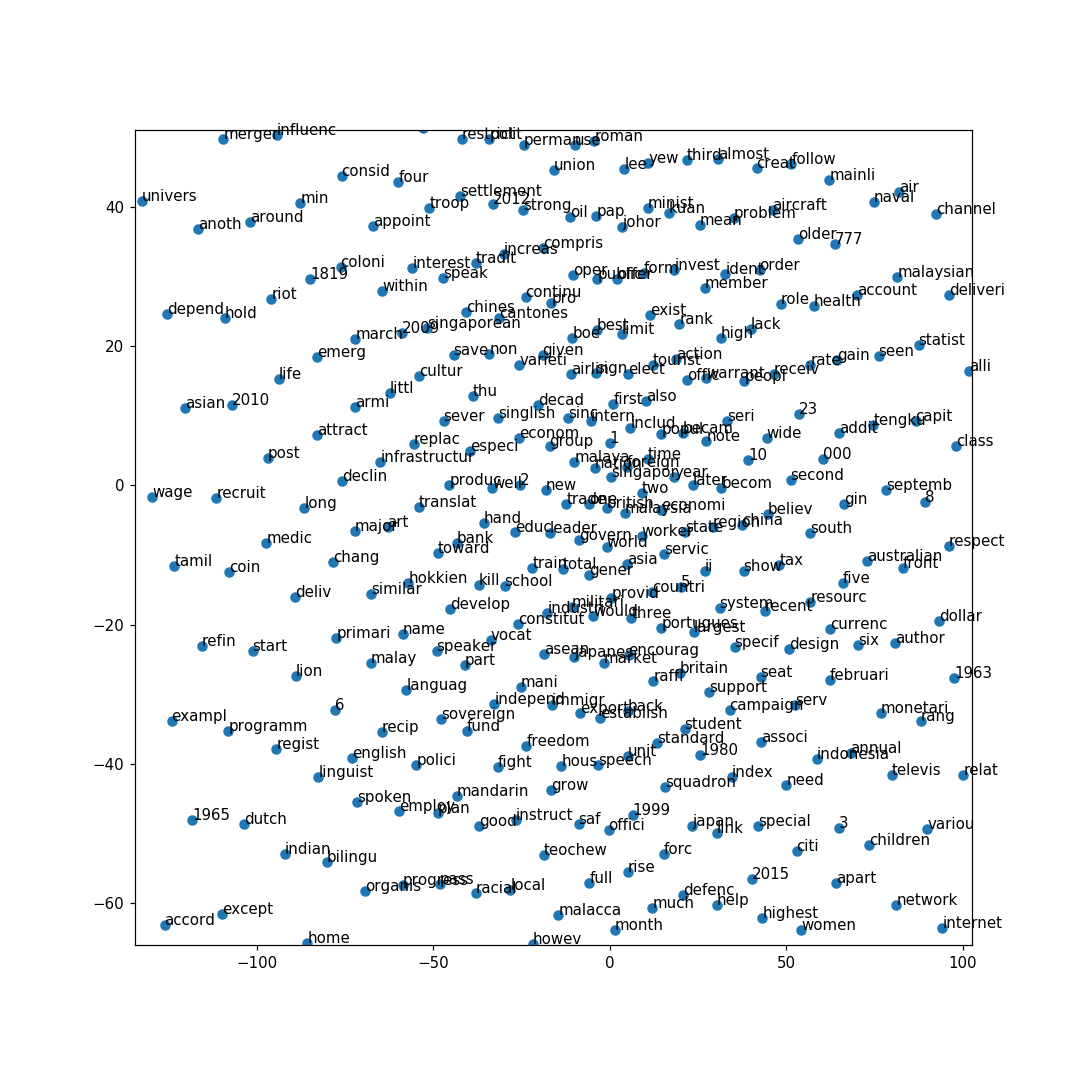

In [215]:
# create a zoomable interactive plot
%matplotlib notebook

# Plot the 2D representation of the word2vec model,
# with the words in its vocabulary as the labels

fig, ax = plt.subplots(figsize=(10, 10))

ax.scatter(df['x'], df['y'])

for word, pos in df.iterrows():
    ax.annotate(word, pos)

## Exercise - Create Corpus and Train Word2Vec

In this exercise, we will create our own corpus and use it to train Word2Vec.

### Create Corpus

Create a corpus of text files, organized in a structure like this:

```
corpus/
   text001.txt
   text002.txt
   text003.txt
   ...
```

A sample corpus is included in the `corpus` folder, created with the first 3 chapters of Moby Dick:
https://www.gutenberg.org/files/2701/2701-0.txt

### Import corpus using NLTK

We will use [`nltk.corpus.reader.plaintext`](http://www.nltk.org/howto/corpus.html) to import the corpus.

Credits: https://stackoverflow.com/questions/4951751/creating-a-new-corpus-with-nltk

In [238]:
from nltk.corpus.reader.plaintext import PlaintextCorpusReader

# directory containing the corpus
corpus_dir = 'corpus/'

# PlaintextCorpusReader uses nltk.tokenize.sent_tokenize() and
# nltk.tokenize.word_tokenize() to split texts into sentences and words
newcorpus = PlaintextCorpusReader(corpus_dir,
                                  '.*\.txt',
                                  encoding='latin1') # or 'utf-8'

In [239]:
# files found by the reader
newcorpus.fileids()

['text001.txt', 'text002.txt', 'text003.txt']

In [242]:
# print the first file in the corpus
f = newcorpus.open('text001.txt')
print(f.read().strip())

CHAPTER 1. Loomings.

Call me Ishmael. Some years agonever mind how long preciselyhaving
little or no money in my purse, and nothing particular to interest me
on shore, I thought I would sail about a little and see the watery part
of the world. It is a way I have of driving off the spleen and
regulating the circulation. Whenever I find myself growing grim about
the mouth; whenever it is a damp, drizzly November in my soul; whenever
I find myself involuntarily pausing before coffin warehouses, and
bringing up the rear of every funeral I meet; and especially whenever
my hypos get such an upper hand of me, that it requires a strong moral
principle to prevent me from deliberately stepping into the street, and
methodically knocking people's hats offthen, I account it high time to
get to sea as soon as I can. This is my substitute for pistol and ball.
With a philosophical flourish Cato throws himself upon his sword; I
quietly take to the ship. There is nothing surprising in this. If they


In [245]:
# sentences in the corpus:
newcorpus.sents()

[['CHAPTER', '1', '.'], ['Loomings', '.'], ...]

In [246]:
# number of sentences
len(newcorpus.sents())

419

In [325]:
def clean_sentence_lists(sentence_lists, remove_stopwords=True):
    """Cleans and converts the sentence lists
    Args:
        text: sentence lists
        remove_stopwords: whether to remove stopwords
    Returns:
        A tuple:
            The cleaned sentence list
            The token count
    """
    # set of English stop words
    stops = set(stopwords.words('english'))

    stemmer = PorterStemmer()
    
    result = []
    wordcount = 0

    for sentence in sentence_lists:
        # Convert to lowercase
        tokens = [t.lower() for t in sentence]
        
        # Remove stop words
        if remove_stopwords:
            tokens = [t for t in tokens if not t in stops]
        
        # Remove non-letters and numbers
        tokens = [re.sub('[^a-zA-Z0-9]', '', t) for t in tokens]
        
        # Stem the words
        tokens = [stemmer.stem(t) for t in tokens]
        
        result += [tokens]
        wordcount += len(tokens)
    
    return (result, wordcount)

Your Tasks:

1. Convert newcorpus.sents() to sentence wordlists, using the `clean_sentence_lists` helper function
2. Train a Word2Vec model, with initial hyperparameter settings (use your best guess)
3. Try some word similarity queries
4. Tweak your model by adjusting some hyperparameter settings
5. Plot the completed Word2Vec model

In [326]:
# 1. Convert newcorpus.sents() to sentence wordlists, 
# using the clean_sentence_lists helper function
#
# Your code here

print('Converting %d sentences to training set...' % len(newcorpus.sents()))

training_set, training_set_size = clean_sentence_lists(newcorpus.sents())

print('Training set size: %d stem words, %d sentences' \
      % (training_set_size, len(training_set)))

training_set

Converting 419 sentences to training set...
Training set size: 6348 stem words, 419 sentences


[['chapter', '1', ''],
 ['loom', ''],
 ['call', 'ishmael', ''],
 ['year',
  'ago',
  '',
  'never',
  'mind',
  'long',
  'precis',
  '',
  'littl',
  'money',
  'purs',
  '',
  'noth',
  'particular',
  'interest',
  'shore',
  '',
  'thought',
  'would',
  'sail',
  'littl',
  'see',
  'wateri',
  'part',
  'world',
  ''],
 ['way', 'drive', 'spleen', 'regul', 'circul', ''],
 ['whenev',
  'find',
  'grow',
  'grim',
  'mouth',
  '',
  'whenev',
  'damp',
  '',
  'drizzli',
  'novemb',
  'soul',
  '',
  'whenev',
  'find',
  'involuntarili',
  'paus',
  'coffin',
  'warehous',
  '',
  'bring',
  'rear',
  'everi',
  'funer',
  'meet',
  '',
  'especi',
  'whenev',
  'hypo',
  'get',
  'upper',
  'hand',
  '',
  'requir',
  'strong',
  'moral',
  'principl',
  'prevent',
  'deliber',
  'step',
  'street',
  '',
  'method',
  'knock',
  'peopl',
  '',
  'hat',
  '',
  '',
  'account',
  'high',
  'time',
  'get',
  'sea',
  'soon',
  ''],
 ['substitut', 'pistol', 'ball', ''],
 ['philosop

In [327]:
# 2. Train a Word2Vec model, with initial hyperparameter settings
#
# Your code here

# Set values for various parameters
sg = 1                # Algorithm: 1: skip-gram, 0: CBOW
num_features = 200    # Word vector dimensionality                      
min_word_count = 10   # Minimum word count                        
num_workers = 2       # Number of threads to run in parallel
context = 10          # Context window size                                                                                    
downsampling = 1e-3   # Downsample setting for frequent words

# Import the built-in logging module and configure it so that Word2Vec 
# creates nice output messages
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s',\
    level=logging.INFO)

# Initialize and train the model.
# This may take a while if your training set is large (e.g. 500,000 words)
print('Training Word2Vec model...')
%time model = word2vec.Word2Vec(training_set, workers=num_workers, \
            size=num_features, min_count = min_word_count, \
            window = context, sample = downsampling)

# If you don't plan to train the model any further, calling 
# init_sims will make the model much more memory-efficient.
model.init_sims(replace=True)

# It can be helpful to create a meaningful model name and 
# save the model for later use. You can load it later using Word2Vec.load()
model_name = "corpus_{}features_{}minwords_{}context_{}downsampling.w2v" \
    .format(num_features, min_word_count, context, str(downsampling))
model.save(model_name)

print('Saved model as %s' % model_name)

2018-06-20 16:56:16,943 : INFO : collecting all words and their counts
2018-06-20 16:56:16,945 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2018-06-20 16:56:16,949 : INFO : collected 1960 word types from a corpus of 6348 raw words and 419 sentences
2018-06-20 16:56:16,950 : INFO : Loading a fresh vocabulary
2018-06-20 16:56:16,953 : INFO : min_count=10 retains 73 unique words (3% of original 1960, drops 1887)
2018-06-20 16:56:16,954 : INFO : min_count=10 leaves 2937 word corpus (46% of original 6348, drops 3411)
2018-06-20 16:56:16,955 : INFO : deleting the raw counts dictionary of 1960 items
2018-06-20 16:56:16,956 : INFO : sample=0.001 downsamples 73 most-common words
2018-06-20 16:56:16,957 : INFO : downsampling leaves estimated 783 word corpus (26.7% of prior 2937)
2018-06-20 16:56:16,958 : INFO : estimated required memory for 73 words and 200 dimensions: 153300 bytes
2018-06-20 16:56:16,959 : INFO : resetting layer weights
2018-06-20 16:56:16,966 : IN

Training Word2Vec model...
Wall time: 75.7 ms
Saved model as corpus_200features_10minwords_10context_0.001downsampling.w2v


In [328]:
# 3. Try some word similarity queries
# Your code here

print('Vocab length:', len(model.wv.vocab))
print('Vocab:', model.wv.vocab)

Vocab length: 73
Vocab: {'': <gensim.models.keyedvectors.Vocab object at 0x000001BC35957E80>, 'never': <gensim.models.keyedvectors.Vocab object at 0x000001BC3596D710>, 'long': <gensim.models.keyedvectors.Vocab object at 0x000001BC358AF8D0>, 'littl': <gensim.models.keyedvectors.Vocab object at 0x000001BC35A2D0F0>, 'thought': <gensim.models.keyedvectors.Vocab object at 0x000001BC35A2DF28>, 'would': <gensim.models.keyedvectors.Vocab object at 0x000001BC35A2DDA0>, 'see': <gensim.models.keyedvectors.Vocab object at 0x000001BC35A2D0B8>, 'part': <gensim.models.keyedvectors.Vocab object at 0x000001BC35A2D4E0>, 'way': <gensim.models.keyedvectors.Vocab object at 0x000001BC35A2DA90>, 'get': <gensim.models.keyedvectors.Vocab object at 0x000001BC35A2D5F8>, 'hand': <gensim.models.keyedvectors.Vocab object at 0x000001BC35A2D390>, 'street': <gensim.models.keyedvectors.Vocab object at 0x000001BC35A2DCF8>, 'time': <gensim.models.keyedvectors.Vocab object at 0x000001BC35A2D7F0>, 'sea': <gensim.models.key

In [329]:
word1 = stemmer.stem('whale')
word2 = stemmer.stem('harpoon')

print('distance: %f' %
      model.wv.distance(word1, word2))

print('similarity: %f' %
      model.wv.similarity(word1, word2))

distance: 0.000912
similarity: 0.999088


In [332]:
word1 = stemmer.stem('whale')
word2 = stemmer.stem('landlord')

print('distance: %f' %
      model.wv.distance(word1, word2))

print('similarity: %f' %
      model.wv.similarity(word1, word2))

distance: 0.001567
similarity: 0.998433


In [331]:
word = stemmer.stem('harpoon')
model.wv.most_similar(word, topn=10)

[('', 0.9997333884239197),
 ('bed', 0.9995042085647583),
 ('room', 0.9994774460792542),
 ('toward', 0.9994606375694275),
 ('night', 0.9994531869888306),
 ('like', 0.9994130730628967),
 ('would', 0.9994083642959595),
 ('place', 0.9993786811828613),
 ('never', 0.9993636012077332),
 ('head', 0.999354362487793)]

In [333]:
vocab = list(model.wv.vocab)
X = model[vocab]

# Apply t-SNE
# this can take a while (like 1 minute or more)
tsne = TSNE(n_components=2)
%time X_tsne = tsne.fit_transform(X)

# Create a dataframe for the 2 dimensions,
# indexed by the words in the vocab
df = pd.DataFrame(X_tsne, index=vocab, columns=['x', 'y'])
df.head()

C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds03\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


Wall time: 2.11 s


,x,y
,-4.122485,4.196155
never,10.596396,-20.780134
long,-127.513420,-45.665520
littl,-55.955807,18.190479
thought,-83.226303,21.602934


<IPython.core.display.Javascript object>


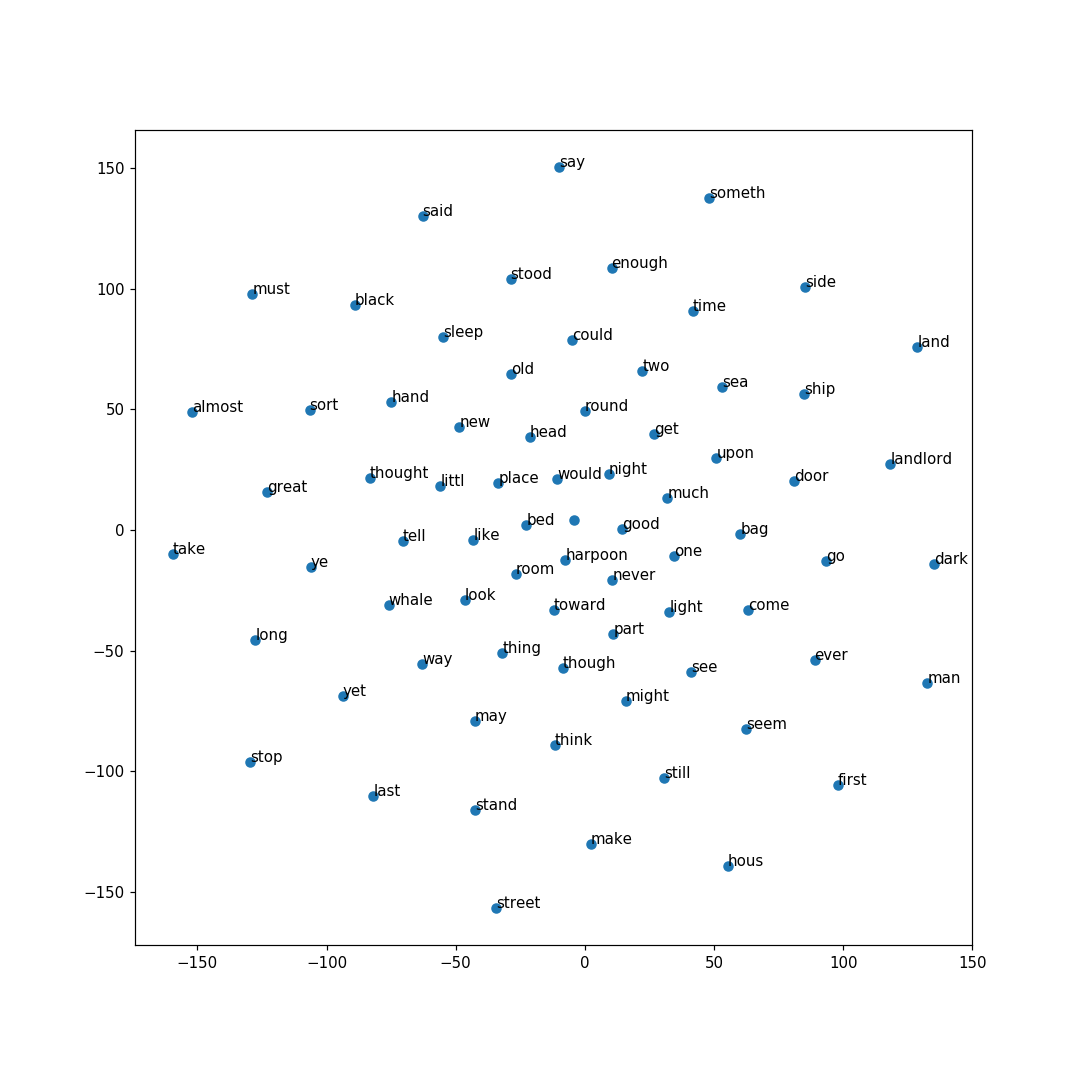

In [334]:
# Plot the completed Word2Vec model

# create a zoomable interactive plot
%matplotlib notebook

# Plot the 2D representation of the word2vec model,
# with the words in its vocabulary as the labels

fig, ax = plt.subplots(figsize=(10, 10))

ax.scatter(df['x'], df['y'])

for word, pos in df.iterrows():
    ax.annotate(word, pos)

https://github.com/charlieg/A-Smattering-of-NLP-in-Python

http://p.migdal.pl/2017/01/06/king-man-woman-queen-why.html